In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import regex as re
import unicodedata
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
with open('./drive/MyDrive/capstone/stops.txt') as f:
    lines = f.readlines()
stops = [i.strip() for i in lines]
stops = stops + ['canadian','european','chinese','norwegian','british','german']

### Base Case

In [5]:
data = pd.read_csv('./drive/MyDrive/capstone/clean_data.csv')
data['cleaned_text'] = data['cleaned_text'].astype(str)
data = data.loc[:,['cleaned_text','peace']]
data = data.dropna()

X = data['cleaned_text']
Y = data['peace']
dev_x, test_x, dev_y, test_y = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(stop_words = stops,max_features=1800, min_df=10, max_df = 0.5)
tf_idf_transformer = TfidfTransformer()
tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(dev_x))
x_train_weight = tf_idf.toarray() 
tf_idf = tf_idf_transformer.transform(vectorizer.transform(test_x))
x_test_weight = tf_idf.toarray()

In [7]:
tf_idf  = pd.DataFrame(x_train_weight, columns=vectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
X_train_vc = tf_idf

In [9]:
from sklearn.cluster import KMeans

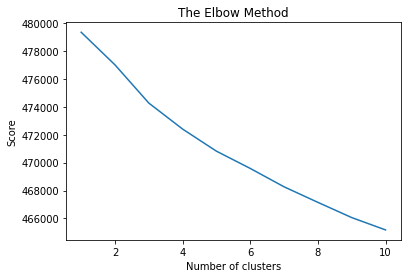

In [10]:
k_clusters = 10

score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X_train_vc)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()


In [11]:
from sklearn.cluster import KMeans
k_clusters = 10
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=200, tol=0.000001, random_state=0)
model.fit(X_train_vc)

KMeans(max_iter=200, n_clusters=10, random_state=0, tol=1e-06)

In [12]:
clusters = model.predict(X_train_vc)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


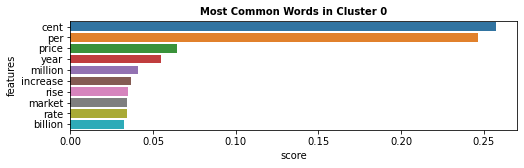

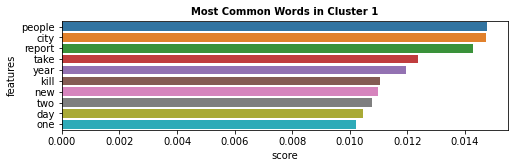

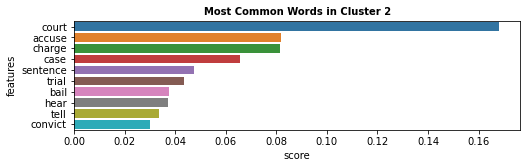

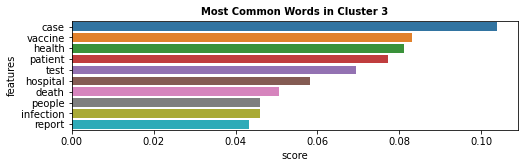

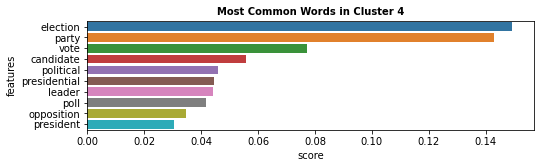

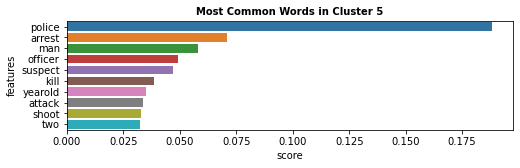

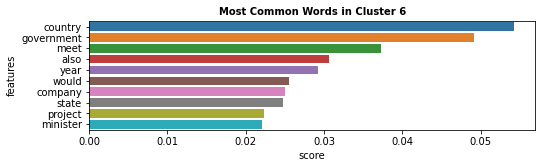

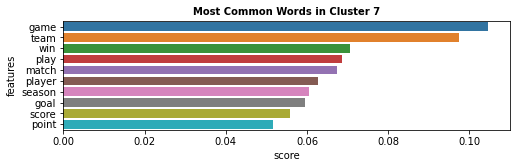

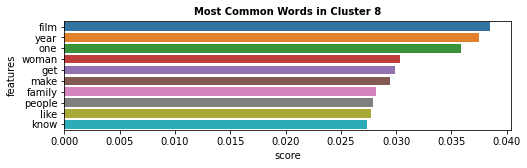

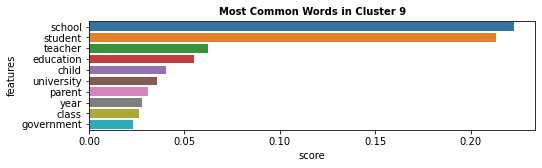

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])

dfs = get_top_features_cluster(X_train_vc.to_numpy(), clusters, 10)
plotWords(dfs, 10)

In [18]:
file = open("./drive/MyDrive/capstone/xlnet_word/positive.txt", 'r')
pos = file.readlines()
pos = pos[0].split(',') 
for line in file.readlines():
    pos = line.rstrip().split(',') 

file = open("./drive/MyDrive/capstone/xlnet_word/negative.txt", 'r')
neg = file.readlines()
neg = neg[0].split(',') 
for line in file.readlines():
    neg = line.rstrip().split(',') 

In [19]:
positive = []
for i in pos:
    positive.append( re.sub(r'[^\w\s]', '', i).strip() )
negative = []
for i in neg:
    negative.append(re.sub(r'[^\w\s]', '', i).strip() )

In [20]:
common_word = list(set(positive).intersection(negative))
unique_peace = [i for i in positive if i not in common_word]
unique_lowpeace = [i for i in negative if i not in common_word]

In [21]:
unique_peace

['canadian',
 'headline',
 'largest',
 'chinese',
 'american',
 'pm',
 'injured',
 'scene',
 'vote',
 'latest',
 'began',
 'french',
 'biggest',
 'dozen',
 'century',
 'website',
 'favourite',
 'lawmaker',
 'whether',
 'celebrate',
 'article',
 'criticism',
 'crisis',
 'year',
 'story',
 'hospital',
 'released',
 'prosecutor',
 'announcement',
 'career',
 'edition',
 'weekend',
 'reporter',
 'convicted',
 'violence',
 'afternoon',
 'champion',
 'victim',
 'born',
 'murder',
 'kilometre',
 'police',
 'allow']

In [22]:
features = vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
from scipy import stats as st
classification = [100] * len(unique_peace)
for i in range(len(unique_peace)):
  word = unique_peace[i]
  if word in features:
    article = np.where(tf_idf[word] != 0)
    classification[i] = st.mode(clusters[article])[0][0]

In [24]:
classification

[100,
 1,
 6,
 100,
 6,
 100,
 100,
 5,
 4,
 6,
 100,
 1,
 6,
 1,
 8,
 1,
 8,
 6,
 6,
 8,
 8,
 6,
 6,
 6,
 8,
 3,
 100,
 2,
 6,
 8,
 8,
 1,
 6,
 100,
 6,
 1,
 7,
 5,
 100,
 5,
 100,
 5,
 6]